Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

sns.set_theme()

In [121]:
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

In [103]:
#retreiving the bikes data from CityBikes API and POIs mereged data ( Foursquare API and Yelp API )

bikes_data = pd.read_csv('bikes_data_part1.csv')

poi_data = pd.read_csv('merged_data.csv')

In [104]:
#checking how many bike stations survived the merge

poi_data['bike_station_name'].nunique()

206

In [105]:
bikes_data.head()

,bike_station_name,free_bikes,latitude,longitude
0,10th & Cambie,11,49.262487,-123.114397
1,10th & Columbia,3,49.262206,-123.109091
2,10th & Commercial,1,49.261403,-123.070102
3,10th & Fraser,1,49.261510,-123.089413
4,10th & Granville,2,49.262598,-123.138921


In [106]:
poi_data.head()

,poi_name,rating_yelp,category_yelp,bike_station_name,distance_to_station,price_yelp,review_count_yelp,rating_fs,total_ratings_fs,popularity_fs,cc_payment_fs,outdoor_seating_fs,street_parking_fs,distance_to_station_fs
0,The Cascade Room,3.9,Pubs,10th & Cambie,992.50,2,235,8.6,200,0.945325,True,False,False,984
1,Tocador,3.7,Latin American,10th & Cambie,999.09,2,50,7.5,14,0.936085,False,False,False,996
2,Anh and Chi,4.0,Vietnamese,10th & Columbia,995.65,3,672,8.9,92,0.988856,False,False,False,986
3,The Cascade Room,3.9,Pubs,10th & Columbia,606.21,2,235,8.6,200,0.945325,True,False,False,598
4,Tocador,3.7,Latin American,10th & Columbia,612.81,2,50,7.5,14,0.936085,False,False,False,610


### Joining the data from Part 1 and Part 2 using Inner join and on the common 'bike_station_name' column

In [107]:
bikes_poi_data = pd.merge(poi_data,bikes_data,how='inner',left_on='bike_station_name',right_on='bike_station_name')

In [108]:
bikes_poi_data.head()

,poi_name,rating_yelp,category_yelp,bike_station_name,distance_to_station,price_yelp,review_count_yelp,rating_fs,total_ratings_fs,popularity_fs,cc_payment_fs,outdoor_seating_fs,street_parking_fs,distance_to_station_fs,free_bikes,latitude,longitude
0,The Cascade Room,3.9,Pubs,10th & Cambie,992.50,2,235,8.6,200,0.945325,True,False,False,984,11,49.262487,-123.114397
1,Tocador,3.7,Latin American,10th & Cambie,999.09,2,50,7.5,14,0.936085,False,False,False,996,11,49.262487,-123.114397
2,Anh and Chi,4.0,Vietnamese,10th & Columbia,995.65,3,672,8.9,92,0.988856,False,False,False,986,3,49.262206,-123.109091
3,The Cascade Room,3.9,Pubs,10th & Columbia,606.21,2,235,8.6,200,0.945325,True,False,False,598,3,49.262206,-123.109091
4,Tocador,3.7,Latin American,10th & Columbia,612.81,2,50,7.5,14,0.936085,False,False,False,610,3,49.262206,-123.109091


In [111]:
#checking to make sure all the rows were joined from POIs dataframe

bikes_poi_data.shape

(471, 17)

In [112]:
# checking the stats for joined data

bikes_poi_data.describe()

,rating_yelp,distance_to_station,price_yelp,review_count_yelp,rating_fs,total_ratings_fs,popularity_fs,distance_to_station_fs,free_bikes,latitude,longitude
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,3.909130,563.744692,2.033970,229.193206,7.740127,138.855626,0.959556,563.290870,8.407643,49.272661,-123.106747
std,0.451453,262.401327,0.436272,213.369350,0.878213,117.506905,0.031831,262.245829,5.981840,0.011037,0.033663
min,2.800000,20.530000,1.000000,2.000000,5.800000,8.000000,0.775669,10.000000,0.000000,49.238105,-123.254307
25%,3.500000,362.000000,2.000000,57.000000,6.700000,45.000000,0.944360,360.000000,4.000000,49.263746,-123.128685
50%,4.000000,570.610000,2.000000,136.000000,7.800000,106.000000,0.971380,571.000000,7.000000,49.273103,-123.104656
75%,4.300000,789.445000,2.000000,353.000000,8.600000,228.000000,0.980303,790.500000,11.000000,49.282087,-123.074754
max,4.700000,1010.100000,4.000000,672.000000,8.900000,441.000000,0.997851,1071.000000,33.000000,49.299292,-123.056909


In [113]:
# replacing the quotation marks in poi_name column to an empty string
bikes_poi_data['poi_name'] = bikes_poi_data['poi_name'].replace('"', '', regex=True)
bikes_poi_data['poi_name'] = bikes_poi_data['poi_name'].replace("''", '', regex=True)
bikes_poi_data['poi_name'] = bikes_poi_data['poi_name'].replace(":", '', regex=True)

In [114]:
# saving the merged data to csv for Part 4
bikes_poi_data.to_csv('bikes_poi_data.csv', sep=',', index=False, encoding='utf-8')

In [ ]:
#checking the dataframe for Null values
bikes_poi_data.isnull().sum()

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

### Number of free bikes per Station

In [14]:
# As the number of bike stations are 271 (a high number).Filtering the stations to have atleast
# 11 bike stations for visualization purposes.

data1 = bikes_data[bikes_data['free_bikes']>=11]

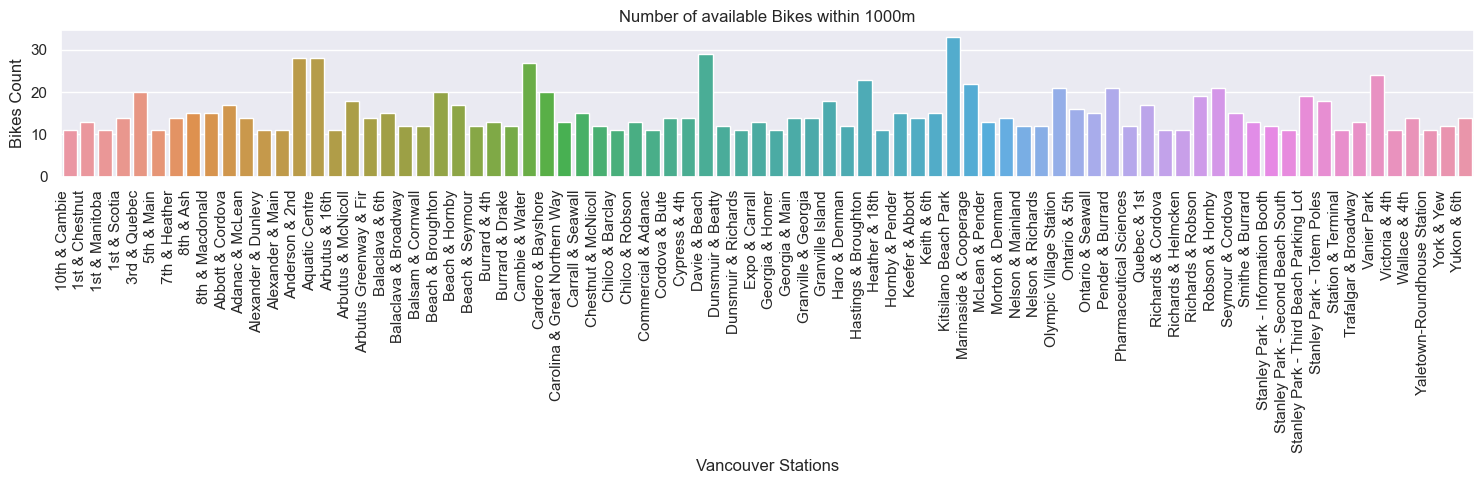

In [63]:
f,ax=plt.subplots(figsize=(15,5))

ax = sns.barplot(data=data1,x=data1['bike_station_name'],y=data1['free_bikes'])

ax.set_xticklabels(data1['bike_station_name'],rotation=90,ha="right")

plt.ylabel('Bikes Count')
plt.xlabel('Vancouver Stations')
plt.title('Number of available Bikes within 1000m')

plt.tight_layout()
plt.show()

Discovery : From the above graph, we could see how the number of free bikes are distributed over different bike stations.

### Number of Bars within 1000m of each station

In [64]:
#grouping the data by bike stations name and counting the number of bars around each station

df = bikes_poi_data.groupby(by='bike_station_name').count()['poi_name']

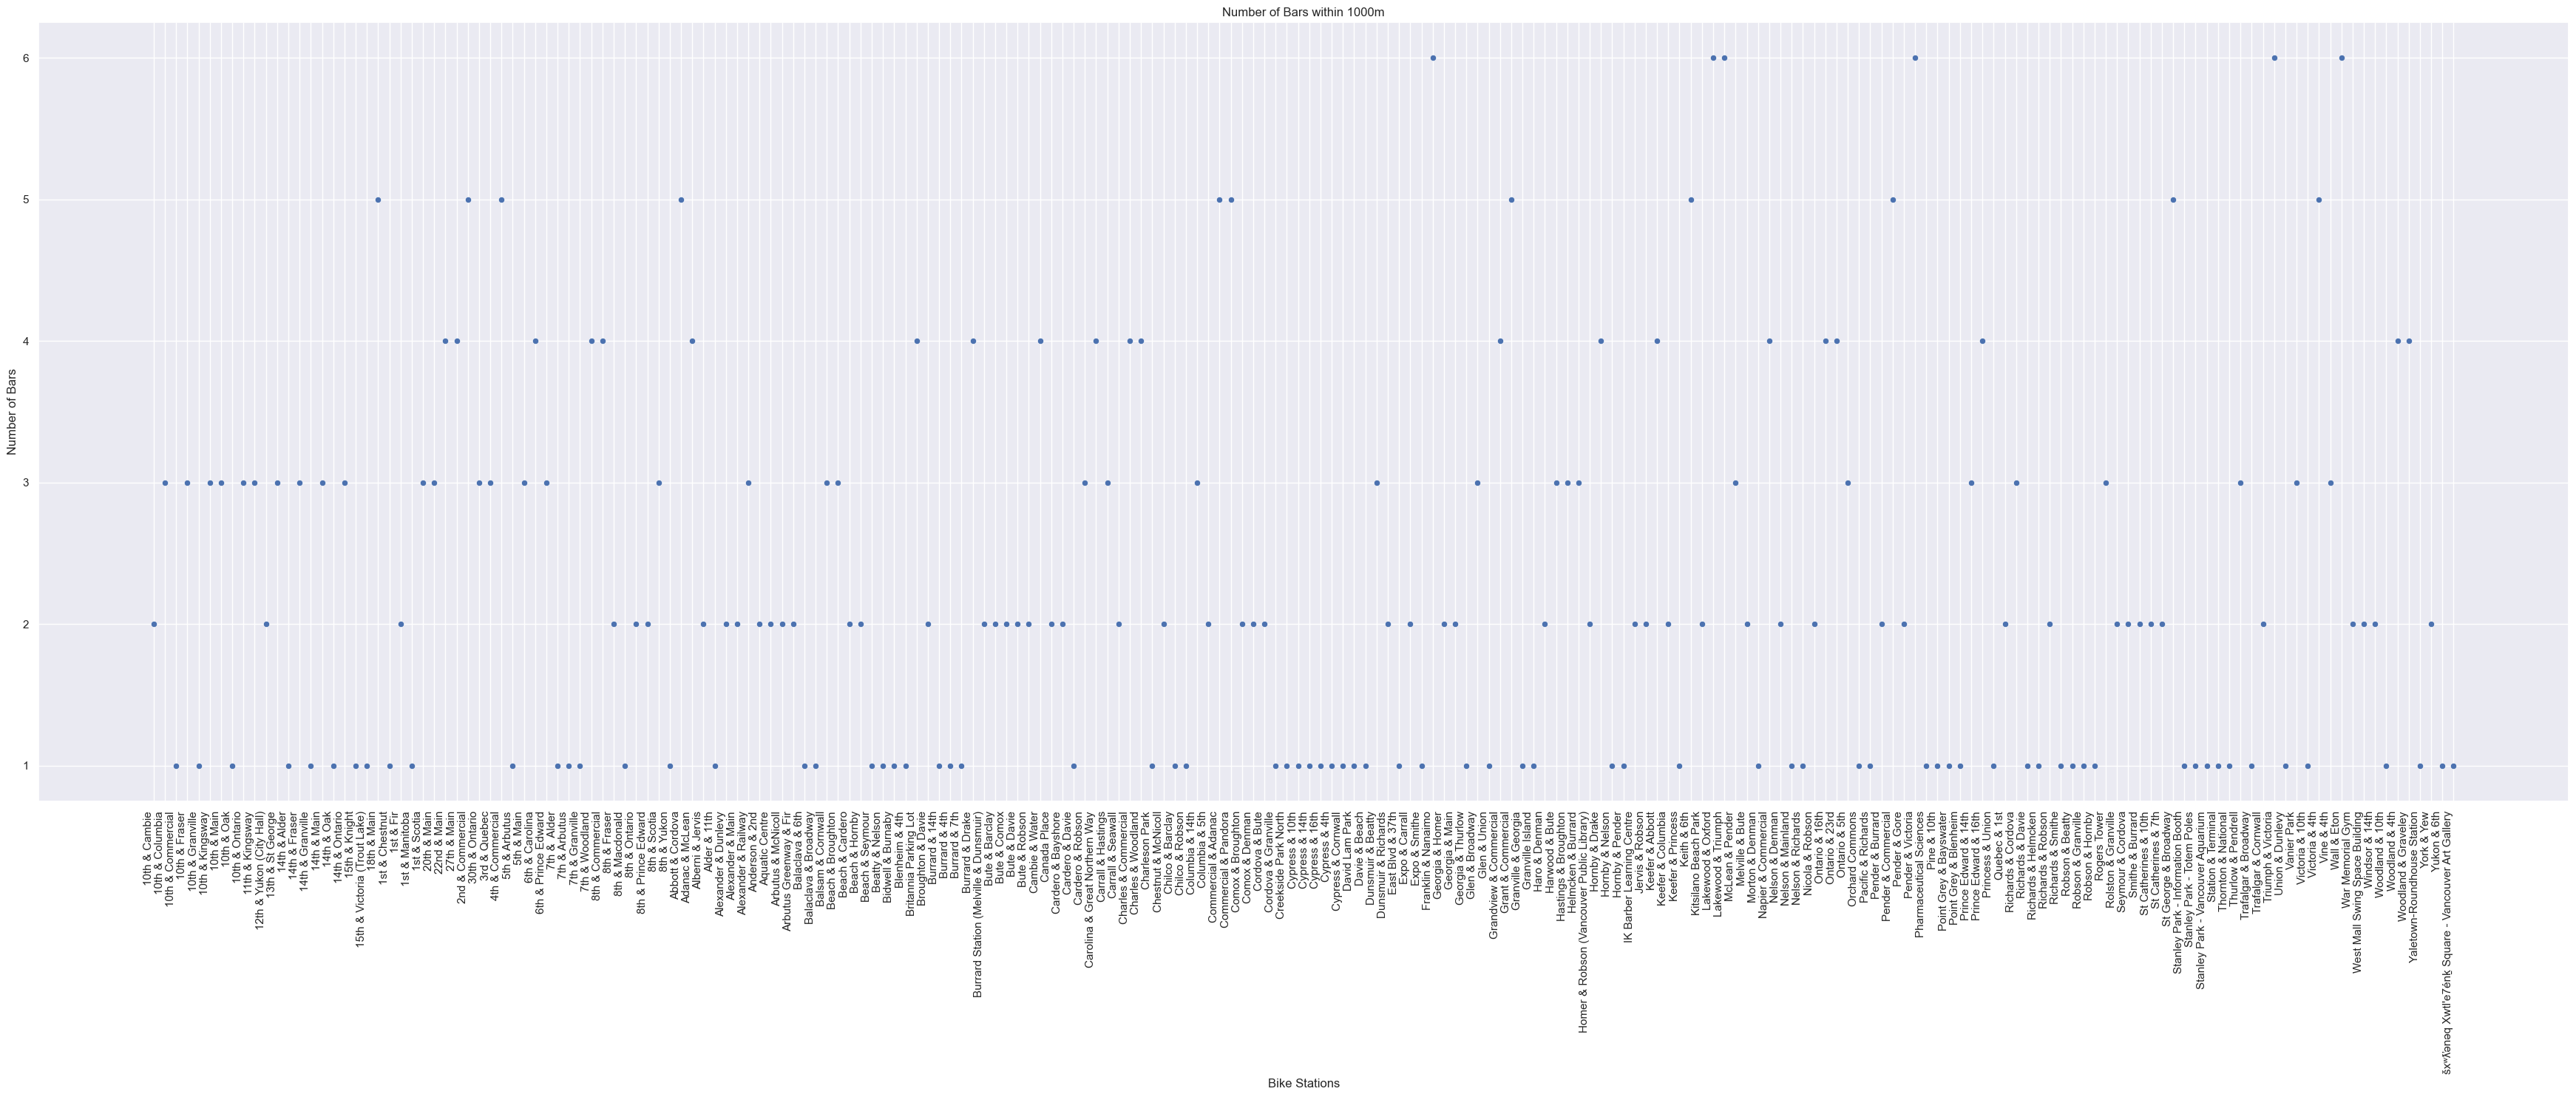

In [65]:
f,ax=plt.subplots(figsize=(35,15))

ax = sns.scatterplot(data=df,x=df.index,y=df.values)

ax.set_xticks(df.index) 
ax.set_xticklabels(df.index,rotation=90,ha="right")

plt.xlabel('Bike Stations')
plt.ylabel('Number of Bars')
plt.title('Number of Bars within 1000m')

plt.tight_layout()
plt.show()

Discovery : From the above graph, we could see how the number of free bikes are distributed over different bike stations over the whole joined dataset

### Number of Bars within 100m of each station and what category each bar belongs to?

In [66]:
#grouping the data by bike stations name and counting the number of bars around each station within 100 m

filtered_data = bikes_poi_data[bikes_poi_data['distance_to_station']<=100]

filtered_data = filtered_data.groupby(by='bike_station_name').count()['poi_name']

In [67]:
#grouping the data by bike stations name and counting the number of bars around each station within 100 m, also dividing the bars into categories

filtered_data1 = bikes_poi_data[bikes_poi_data['distance_to_station']<=100]

df1 = filtered_data1.groupby(['bike_station_name','category_yelp']).count()['poi_name']
df1 = pd.DataFrame(df1)
df1 = df1.reset_index()

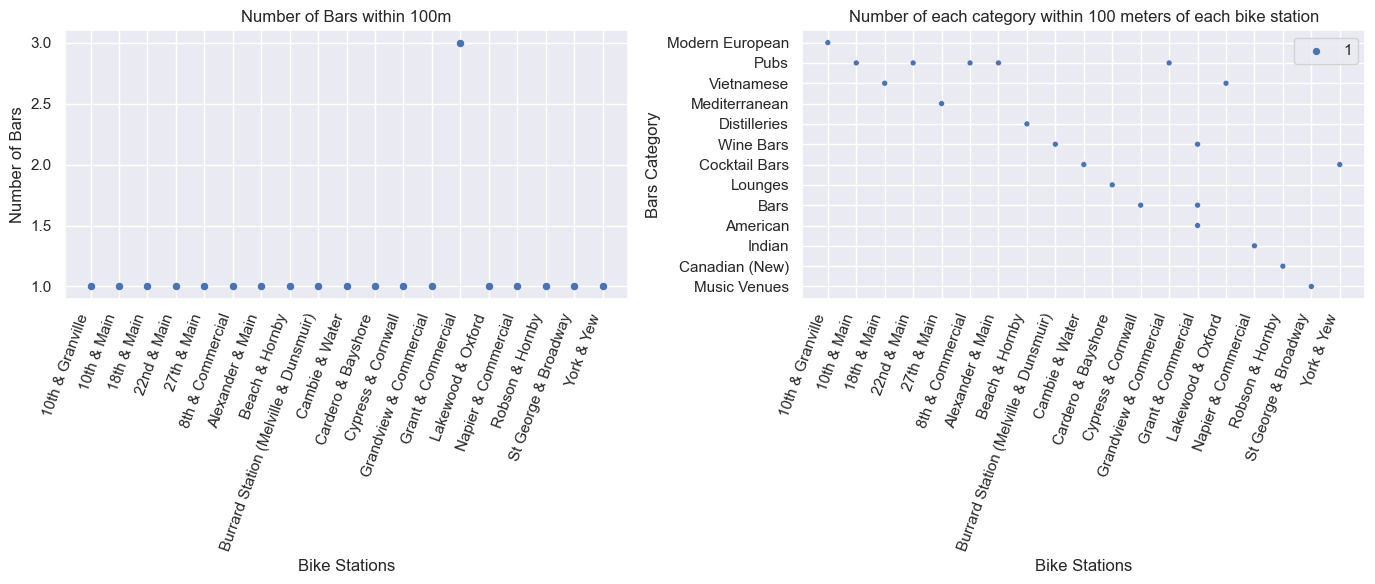

In [68]:
f,ax=plt.subplots(1,2,figsize=(14,6))

sns.scatterplot(data=filtered_data,x=filtered_data.index,y=filtered_data.values,ax=ax[0])

ax[0].set_xticks(filtered_data.index) 
ax[0].set_xticklabels(filtered_data.index,rotation=70,ha="right")

ax[0].set_xlabel('Bike Stations')
ax[0].set_ylabel('Number of Bars')
ax[0].set_title('Number of Bars within 100m')

###########################

sns.scatterplot(data=df1,x=df1['bike_station_name'],y=df1['category_yelp'],hue='poi_name',size='poi_name',palette="deep",legend="full",ax=ax[1])

ax[1].set_xticks(df1['bike_station_name'].unique())
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=70, ha="right")

ax[1].set_xlabel('Bike Stations')
ax[1].set_ylabel('Bars Category')
ax[1].set_title('Number of each category within 100 meters of each bike station')

plt.legend(loc='upper right',bbox_to_anchor=(1, 1))

plt.tight_layout()

Discovery : From the above graphs, we could see which stations have the POIs within 100m of distance and right graph indicates what are the categories of those Bars.

Example : Station 10th & Granville has 1 POIs within 100m and it's category is Modern European as seen from the right graph

### Number of Free Bikes vs Average distance of POI from Station

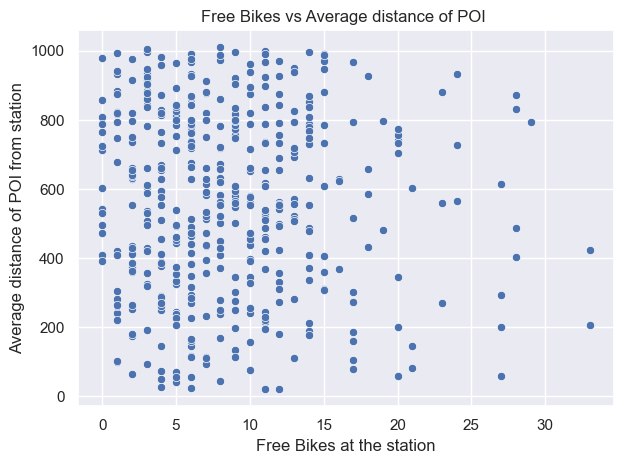

In [100]:
sns.scatterplot(data=bikes_poi_data, y="distance_to_station", x="free_bikes")

plt.xlabel('Free Bikes at the station')
plt.ylabel('Average distance of POI from station')
plt.title('Free Bikes vs Average distance of POI ')

plt.tight_layout()

plt.show()

Discovery : From the above graphs, we could see there is not a linear relationship between both the variables as one of the POI with 0 free bikes
are nearer to the station whereas a POI with 0 free bikes can also be seen at a farther located POI.

### Number of Free Bikes vs Number of POIs around the station

In [70]:
#dataframe filteration to retreive number of POIs around each station

bikes_count = bikes_poi_data[['bike_station_name','free_bikes']].drop_duplicates()

revised_data = pd.DataFrame({'bike_station_name':bikes_poi_data['bike_station_name'].unique()}) 

number_poi = bikes_poi_data.groupby('bike_station_name')['poi_name'].count()

revised_data['number_of_poi'] = number_poi.values
revised_data['bikes_count'] = bikes_count['free_bikes'].values

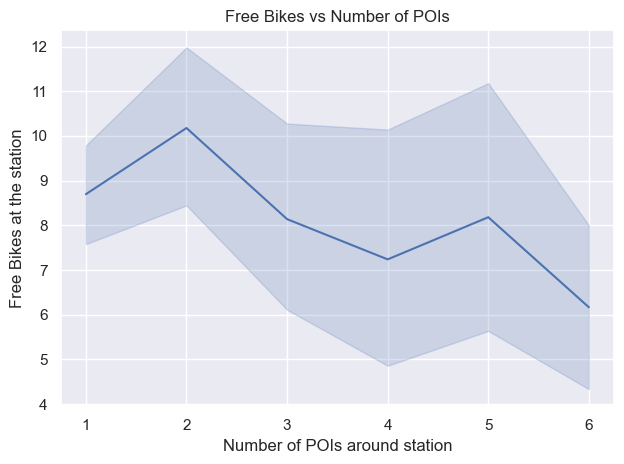

In [122]:
sns.lineplot(data=revised_data ,y="bikes_count",x='number_of_poi')

plt.xlabel('Number of POIs around station')
plt.ylabel('Free Bikes at the station')
plt.title('Free Bikes vs Number of POIs')

plt.tight_layout()

plt.show()

Discovery : From the above graphs, we could see a positive and negative relationship between both the variables but not enough strong evidence number of POIs influence the free bikes in that station. At X-Axis on 2 and 5 we see a positive relationship and after 2, 3, 5 a negative relationship can be seen but both are unsteady.

-------

### Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [123]:
import sqlite3
from sqlite3 import Error
from pathlib import Path

In [124]:
import sqlite3
from sqlite3 import Error

connection = None

try:
    connection = sqlite3.connect('../data/project_data.db')
    print("Connection to SQLite DB successful")
except Error as e:
    print(f"The error '{e}' occurred")

Connection to SQLite DB successful


In [131]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [126]:
#creating a table for final joined data from Bikes and POIs APIs

create_bikes_poi_table = """
CREATE TABLE IF NOT EXISTS bikes_poi_table (
  poi_name TEXT NOT NULL,
  rating_yelp REAL,
  category_yelp TEXT,
  bike_station_name TEXT NOT NULL,
  distance_to_station FLOAT,
  price_yelp INT,
  review_count_yelp REAL,
  rating_fs REAL,
  total_ratings_fs REAL,
  popularity_fs REAL,
  cc_payment_fs BOOLEAN,
  outdoor_seating_fs BOOLEAN,
  street_parking_fs BOOLEAN,
  distance_to_station_fs REAL,
  free_bikes INT NOT NULL,
  latitude REAL  NOT NULL,
  longitude REAL  NOT NULL 
);
"""

In [127]:
execute_query(connection, create_bikes_poi_table)  

Query executed successfully


In [ ]:
#Inserting the rows from the current bikes_poi_data dataframe to SQL database table created

for row in bikes_poi_data.itertuples():
    insert_sql = f'INSERT INTO bikes_poi_table(poi_name, rating_yelp, category_yelp,bike_station_name,distance_to_station,price_yelp,review_count_yelp,rating_fs,total_ratings_fs,popularity_fs,cc_payment_fs,outdoor_seating_fs,street_parking_fs,distance_to_station_fs,free_bikes,latitude,longitude) VALUES("{row[1]}",{row[2]},"{row[3]}","{row[4]}",{row[5]},{row[6]},{row[7]},{row[8]},{row[9]},{row[10]},{row[11]},{row[12]},{row[13]},{row[14]},{row[15]},{row[16]},{row[17]})'

    execute_query(connection, insert_sql)

In [132]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [133]:
select_pois = "SELECT * from bikes_poi_table LIMIT 3"
bikes_poi_sample = execute_read_query(connection, select_pois)

for sample in bikes_poi_sample:
    print(sample)

('The Cascade Room', 3.9, 'Pubs', '10th & Cambie', 992.5, 2, 235.0, 8.6, 200.0, 0.945324996364694, 1, 0, 0, 984, 11, 49.262487, -123.114397)
('Tocador', 3.7, 'Latin American', '10th & Cambie', 999.09, 2, 50.0, 7.5, 14.0, 0.936084709241609, 0, 0, 0, 996, 11, 49.262487, -123.114397)
('Anh and Chi', 4.0, 'Vietnamese', '10th & Columbia', 995.65, 3, 672.0, 8.9, 92.0, 0.9888561344137904, 0, 0, 0, 986, 3, 49.262206, -123.109091)


## Look at the data before and after the join to validate your data.

### Confirming the shape of the database and dataframe

In [134]:
bikes_poi_data.shape

(471, 17)

In [138]:
count_data = """SELECT COUNT(*) FROM bikes_poi_table"""
counting = execute_read_query(connection, count_data)

for sample in counting:
    print(sample)

(471,)


### Confirming the shape of the database and dataframe

In [149]:
bikes_poi_data['price_yelp'].value_counts().sort_index()

price_yelp
1     26
2    414
3     20
4     11
Name: count, dtype: int64

In [144]:
count_data = """SELECT price_yelp, COUNT(*) FROM bikes_poi_table GROUP BY price_yelp"""
counting = execute_read_query(connection, count_data)

for sample in counting:
    print(sample)

(1, 26)
(2, 414)
(3, 20)
(4, 11)


### Counting the sum of Rating

In [150]:
query = """SELECT SUM(rating_yelp) FROM bikes_poi_table"""
query_result = execute_read_query(connection, query)

for sample in query_result:
    print(sample)

(1841.1999999999941,)


In [151]:
bikes_poi_data['rating_yelp'].sum()

1841.1999999999998

### A random query for validation

In [152]:
query = """SELECT COUNT(poi_name) FROM bikes_poi_table WHERE rating_fs > 8.2"""
query_result = execute_read_query(connection, query)

for sample in query_result:
    print(sample)

(154,)


In [153]:
bikes_poi_data[bikes_poi_data['rating_fs']>8.2].count()['poi_name']

154

from all these above queries, we can determine that data was successfully saved to SQL database